# Implementing A Dense Neural Network in Numpy

In [1]:
import numpy as np
from IPython.display import Image

## 1. Network architecture: a dense neural network
![avatar](./nn_architecture.png)

The NN architecture will be delivered to our program in the form of list. Each item in the list is a dictionary describing the basic parameters of a single network layer:
1. input_dim - the size of the signal vector supplied as an input for the layer
2. output_dim - the size of the activation vector obtained at the output of the layer
3. activation - the activation function to be used inside the layer

In [2]:
NN_ARCHITECTURE = [
    {
        "input_dim": 2,
        "output_dim": 25,
        "activation": "relu"
    },
    {
        "input_dim": 25,
        "output_dim": 50,
        "activation": "relu"
    },
    {
        "input_dim": 50,
        "output_dim": 50,
        "activation": "relu"
    },
    {
        "input_dim": 50,
        "output_dim": 25,
        "activation": "relu"
    },
    {
        "input_dim": 25,
        "output_dim": 1,
        "activation": "sigmoid"
    },
]

## 2. Initiation of layers parameters 

1. Parameter initiation using small random numbers is simple approach, but it guarantees good enough starting point for out algorithm. 
2. The generated parameters values are stored in a dictionary called ``params_values`` with a key that uniquely identifies to which layer they belong. Ex. W1, b1, W2, b2, ...
3. The dictionary ``params_values`` will be returned at the end of the function ``init_layers()``, so we can use it in the next stages of our algorithm.

In [21]:
def init_layers(nn_architecture, seed=99):
    # random seed initiation
    np.random.seed(seed)
    # number of layers in our neural network
    number_of_layers = len(nn_architecture)
    # parameters storage initiation
    params_values = {}

    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1

        # extracting the number of units in layers
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]

        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1

    return params_values

## 3. Activation Functions and their Derivative Functions
1. Activation functions can be written in a single line of code, but they give the neural nets non-linearity and therefore the expressiveness that they need. 
2. We have to prepare the derivative of activation function in order to be able to go full circle and pass both forward and backward propagation.

The derivative function of loss value w.r.t. the input $Z$ of the sigmoid activation function is:
$$
\frac{d\, loss}{d\, Z} = \frac{d\, loss}{d\, sigmoid(Z)}\cdot \frac{d\, sigmoid(Z)}{d\, Z} = \frac{d\, loss}{d\, sigmoid(Z)}\cdot sigmoid(Z)(1-sigmoid(Z)).
$$

The derivative function of loss value w.r.t. the input $Z$ of the relu activation function is:
$$
\frac{d\, loss}{d\, Z} = \frac{d\, loss}{d\, relu(Z)}\cdot \frac{d\, relu(Z)}{d\, Z} = \frac{d\, loss}{d\, relu(Z)}\cdot 1\{Z>0\},
$$
where $1\{Z>0\}$ will be one if $Z > 0$, otherwise it will be zero.

In [22]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def relu(Z):
    return np.maximum(0, Z)


def sigmoid_backward(dA, Z):
    '''
    calculate the derivative of the loss w.r.t. the input of the sigmoid activation function
    
    Args:
        dA (a number) - the derivative of the loss w.r.t the output of the sigmoid activation function
        Z (a number) - the input of the sigmoid activation function
    Returns:
        the derivative of the loss w.r.t the input of the sigmoid activation function
    '''
    ##### Write your codes below #####
    #return (the derivative of the loss w.r.t the output of the activation function)*(the derivative of the output of the activation function w.r.t the input of the activation function)
    return dA*sigmoid(Z)*(1-sigmoid(Z))


def relu_backward(dA, Z):
    '''
    calculate the derivative of the loss w.r.t. the input of the relu activation function
    
    Args:
        dA(a number) - the derivative of the loss w.r.t the output of the relu activation function
        Z(a number) - the input of the relu activation function
    Returns:
        the derivative of the loss w.r.t the input of the relu activation function
    '''
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ


## 4. Forward Propagation

### 4.1 Single layer forward propagation step

Given the input matrix, we compute its affine transformation and then apply selected activation function. Note that we can use matrix operations to compute for whole layer and whole batch of examples at once. Mathematically speaking, let $m$ be the batch size and $A_{prev}$ be the $\textit{input_dim}\times m$-input matrix of the current layer (which is also the output of the previous layer). Then by affine transformation, the input matrix $Z_{curr}$ of the activation is denoted as 
$$
Z_{curr} = W_{curr} * A_{prev} + b_{curr},
$$
where $W_{curr}$ is the weight matrix of $\textit{output_dim} \times \textit{input_dim}$, $b_{curr}$ is a matrix of $\textit{output_dim} \times 1$ and thus by broadcast machnism, $Z_{curr}$ is of $\textit{output_dim} \times m$.
Then by the activation function, we get the output matrix of the layer $A_{curr}$, which is given by
$$
A_{curr} = \textit{activation_func}(Z_{curr})
$$

In [23]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr,
                                     activation="relu"):
    '''
    calculate the output and input matrix of the activation function for a single layer
    Args:
        A_prev (input_dim*m) - the output matrix of the activation function in the previous layer, each column corresponds to one sample
        W_curr (output_dim*input_dim) - the weight matrix of the current layer
        b_curr (output_dim*1) - the bias matrix of the current layer
        activation - the name of activation function

    Returns:
        A_curr (output_dim*m) - the output matrix of the activation function in the current layer
        Z_curr (output_dim*m) - the input matrix of the activation function in the current layer
        
    '''
    ##### Write your codes below #####
    # calculation of the input value for the activation function, that is Z_curr
    Z_curr =  W_curr@A_prev + b_curr
    
    # selection of activation function
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
    
    # calculation of the output value for the activation function, that is A_curr
    A_curr = activation_func(Z_curr)
    
    # return the matrix A_curr, Z_curr
    return A_curr, Z_curr

### 4.2 Full Forward Propagation

In [24]:
def full_forward_propagation(X, params_values, nn_architecture):
    '''
    to calculate the output of the neural network and store all the intermediate values
    '''
    
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0
    A_curr = X

    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr

        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        # extraction of W for the current layer
        W_curr = params_values["W" + str(layer_idx)]
        # extraction of b for the current layer
        b_curr = params_values["b" + str(layer_idx)]
        # calculation of activation for the current layer
        A_curr, Z_curr = single_layer_forward_propagation(
            A_prev, W_curr, b_curr, activ_function_curr)

        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr

    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

## 5. Backward propagation

In NN, we use backpropagation to calculate derivatives of the loss with respect to all parameters.

### 5.1 Single layer backward propagation step

At first, we consider the backward propagation step for one single layer. Recall that the input matrix $Z_{curr}$ of the activation function is 
$$
Z_{curr} = W_{curr} * A_{prev} + b_{curr},
$$
where $W_{curr}$ is the weight matrix of $\textit{output_dim} \times \textit{input_dim}$, $A_{prev}$ is of $\textit{input_dim}\times m$, $b_{curr}$ is of $\textit{output_dim} \times 1$ and thus by broadcast machnism, $Z_{curr}$ is of $\textit{output_dim} \times m$.
Then by the activation function, we get the output matrix of the layer $A_{curr}$, which is given by
$$
A_{curr} = \textit{activation_func}(Z_{curr})
$$

1. Now we consider the the derivative of the averaged loss value(or called empirical risk) $Loss$ w.r.t. the weight matrix $W_{curr}$:
for $i\in 1,\ldots, \textit{output_dim}$ and $j = 1,\ldots, \color{red}{\textit{input_dim}}$, we have 
$$
\frac{d\, Loss}{d\, W_{curr}}[i,j] = \frac{1}{m} \sum_{k=1}^m (\frac{d\, Loss_k}{d\, Z_{curr}[:,k]})[i] \cdot A_{prev}\color{red}{[j,k]},
$$
where $Loss_k$ is the loss value of the $k$-th sample and $Z_{curr}[:,k]$ corresponds to the $k$-th sample's input of activation function. In the following codes, we use ``dZ_curr`` to store the gradient $\frac{d\,Loss_k}{d\,Z_{curr}[:,k]}$, that is, 
$$
\textit{dZ_curr}[i,k] = (\frac{d\, Loss_k}{d\, Z_{curr}[:,k]})[i].
$$
In the code, we use ``dW_curr`` to store the derivative matrix $\frac{d\, Loss}{d\, W_{curr}}$. To be specific,
$$
\textit{dW_curr}[i,j] = \frac{d\, Loss}{d\, W_{curr}}[i,j]
$$

2. Similarly, the the derivative of Loss w.r.t. the bias vector $b_{curr}$:
for $i\in [\textit{output_dim}]$, we have 
$$
\frac{d\, Loss}{d\, b_{curr}}[i,1] = \frac{1}{m} \sum_{k=1}^m (\frac{d\, Loss_k}{d\, Z_{curr}[:,k]})[i].
$$
In the code, we use ``db_curr`` to store the derivative matrix $\frac{d\, Loss}{d\, b_{curr}}$. To be specific,
$$
\textit{db_curr}[i,1] = \frac{d\, Loss}{d\, \color{red}{b_{curr}}}[i,1]
$$

3. The the derivative of the averaged loss value(or called empirical risk) $Loss$ w.r.t. the input of the current layer $A_{prev}$: for $i\in 1,\ldots, \textit{input_dim}$ and $j = 1,\ldots, m$, we have 
$$
\frac{d\, Loss_j}{d\, A_{prev}[:,j]}[i] = \sum_{k=1}^{\textit{output_dim}} (\frac{d\, Loss_j}{d\, Z_{curr}[:,j]})[k] \cdot W_{curr}[k,i],
$$
where $A_{prev}[:,j]$ corresponds to the $j$-th sample's input of the current layer( or the output of the activation function in the previous layer).
In the code, we use ``dA_prev`` to store the derivative matrix $\frac{d\, Loss_j}{d\, A_{prev}[:,j]}$. To be specific,
$$
\textit{dA_prev}[i,j] = \frac{d\, Loss_j}{d\, A_{prev}[:,j]}[i]
$$

In [25]:
'''
The essence of this algorithm is the recursive use of a chain rule known from differential calculus - calculate a derivative of functions created by assembling other functions, whose derivatives we already know.
'''

def single_layer_backward_propagation(dA_curr,
                                      W_curr,
                                      b_curr,
                                      Z_curr,
                                      A_prev,
                                      activation="relu"):
    '''
    calculate the derivative with respect to output and input matrix of the activation function for a single layer
    Args:
        dA_curr (output_dim*m) - the j-th column of the matrix represents the gradient of the loss value of the j-th 
                                 sample with respect to its output A_{curr}[:,j] in the current layer
        W_curr (output_dim*input_dim) - the weight matrix of the current layer
        b_curr (output_dim*1) - the bias matrix of the current layer
        Z_curr (output_dim*m) - the input matrix of the activation function in the current layer, where each column corresponds to one sample
        A_prev (input_dim*m) - the output matrix of the activation function in the previous layer, where each column corresponds to one sample
        activation - the name of activation function

    Returns:
        dA_prev (input_dim*m) - the j-th column of the matrix represents the gradient of the loss value of the j-th 
                                 sample with respect to its output A_{curr}[:,j] in the previous layer
        dW_curr (output_dim*input_dim) - the derivative of the averaged loss w.r.t the weight matrix in the current layer
        db_curr (output_dim*1) - the derivative of the averaged loss w.r.t the bias matrix in the current layer
    '''
    #print("A_prev.shape = ", A_prev.shape)
    #print("Z_curr.shape = ", Z_curr.shape)
    #print("dA_curr.shape = ", dA_curr.shape)
    # number of samples
    m = A_prev.shape[1]

    # selection of activation function
    if activation == "relu":
        backward_activation_func = relu_backward
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')

    # calculation of the activation function derivative
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    #print("dZ_curr.shape = ", dZ_curr.shape)
    #print("W_curr.shape = ", W_curr.shape)
    ##### Write your codes below #####
    # derivative of the matrix W
    dW_curr = (dZ_curr@A_prev.T)/m
    #print("dW_curr.shape = ", dW_curr.shape)
    # derivative of the vector b
    ones = np.ones((m,1))
    #print("ones.shape = ", ones.shape)
    db_curr = (dZ_curr@ones)/m
    #print("db_curr.shape = ", db_curr.shape)
    # derivative of the matrix A_prev
    dA_prev = W_curr.T@dZ_curr
    #print("dA_prev.shape = ", dA_prev.shape)
    
    return dA_prev, dW_curr, db_curr

## 5.2 Full Backward propagation

In [26]:
def full_backward_propagation(Y_hat, Y, memory, params_values,
                              nn_architecture):
    '''
    to calculate the derivative of the empirical risk w.r.t all parameters in the neural network and store in the list grads_values
    '''
    grads_values = {}

    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)

    # initiation of gradient descent algorithm
    dA_prev = -(np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))

    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]

        dA_curr = dA_prev

        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]

        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]

        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)

        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr

    return grads_values

## 6. Calculating Loss/Cost

In [27]:
''' 
using binary cross-entropy loss function
'''
def get_cost_value(Y_hat, Y):
    # number of examples
    m = Y_hat.shape[1]
    # calculation of the cost according to the formula
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + \
        np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

## Calculating Accuracy

In [28]:
# an auxiliary function that converts probability into class
def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_


def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

## 7. Training Function

### 7.1 Updating parameter values

The goal of this method is to update network parameters using gradient optimization.

In [29]:
'''
In this way, we try to bring our target function closer to a minimum.
To accomplish this task, we will use two dictionaries provided as function arguments:
- params_values, which stores the current values of parameters,
- grads_values, which stores cost function derivatives calculated with respect to these parameters.
'''


def update(params_values, grads_values, nn_architecture, learning_rate):

    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        params_values["W" + str(layer_idx)] -= \
            learning_rate * grads_values["dW" + str(layer_idx)]
        params_values["b" + str(layer_idx)] -= \
            learning_rate * grads_values["db" + str(layer_idx)]

    return params_values


### 7.2 Putting things together

In [30]:
def train(X,
          Y,
          nn_architecture,
          epochs,
          learning_rate,
          verbose=False,
          callback=None):
    # initiation of neural net parameters
    params_values = init_layers(nn_architecture, 2)
    # initiation of lists storing the history
    # of metrics calculated during the learning process
    cost_history = []
    accuracy_history = []

    # performing calculations for subsequent iterations
    for i in range(epochs):
        # step forward
        Y_hat, cashe = full_forward_propagation(X, params_values,
                                                nn_architecture)

        # calculating metrics and saving them in history
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)

        # step backward - calculating gradient
        grads_values = full_backward_propagation(Y_hat, Y, cashe,
                                                 params_values,
                                                 nn_architecture)
        # updating model state
        params_values = update(params_values, grads_values, nn_architecture,
                               learning_rate)

        if (i % 50 == 0):
            if (verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".
                      format(i, cost, accuracy))
            if (callback is not None):
                callback(i, params_values)

    return params_values, cost_history, accuracy_history

## 8. A Binary Classification Example

In [31]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

### 8.1 Create artificial dataset

In [32]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_classification"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    data_y = pd.Categorical(data_y).codes.reshape(-1)
    return data_X, data_y


def main():

    # read dataset from csv file
    data_name = "messidor_classification"
    data_X, data_y = load_data("{}.csv".format(data_name))
    # pd.csv.split(5)

    # Train and test set
    kf = KFold(n_splits=10)
    res_list = []
    for train_index, test_index in kf.split(data_X):
        train_X, train_y = data_X[train_index,:], data_y[train_index]
        test_X, test_y = data_X[test_index,:], data_y[test_index]
    
    return train_X, train_y,test_X, test_y


In [ ]:
def run():
    # running the model and getting the accuracy
    model_SVM = SVM(C = 0.1, sigma = 1, toler=0.01, maxIter=4000)
    b, alphas = model_SVM.fit(main()[0], main()[1])
    y_test_hat = model_SVM.predict(main()[2])
    accuracy = np.mean(y_test_hat == main()[3])
    print("The accuracy of SVM is:", accuracy)

In [33]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1

X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(900, 2) (900,) (100, 2) (100,)


### 8.2 Auxiliary plotting function

In [34]:
# the function making up the graph of a dataset
def make_plot(X,
              y,
              plot_name,
              file_name=None,
              XX=None,
              YY=None,
              preds=None,
              dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(9, 6))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if (XX is not None and YY is not None and preds is not None):
        plt.contourf(XX,
                     YY,
                     preds.reshape(XX.shape),
                     25,
                     alpha=1,
                     cmap=cm.Spectral)
        plt.contour(XX,
                    YY,
                    preds.reshape(XX.shape),
                    levels=[.5],
                    cmap="Greys",
                    vmin=0,
                    vmax=.6)
    plt.scatter(X[:, 0],
                X[:, 1],
                c=y.ravel(),
                s=40,
                cmap=plt.cm.Spectral,
                edgecolors='black')
    if (file_name):
        plt.savefig(file_name)
        plt.close()
    else:
        plt.show()
        plt.close()

In [17]:
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 2.5
GRID_Y_START = -1.0
GRID_Y_END = 2
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./binary_classification_vizualizations/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Definition of grid boundaries
grid = np.mgrid[GRID_X_START:GRID_X_END:100j, GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid


def callback_numpy_plot(index, params):
    plot_title = "NumPy Model - It: {:05}".format(index)
    file_name = "numpy_model_{:05}.png".format(index // 50)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs, _ = full_forward_propagation(np.transpose(grid_2d),
                                                   params, NN_ARCHITECTURE)
    prediction_probs = prediction_probs.reshape(prediction_probs.shape[1], 1)
    make_plot(X_test,
              y_test,
              plot_title,
              file_name=file_path,
              XX=XX,
              YY=YY,
              preds=prediction_probs,
              dark=True)

### 8.3 Visualization of the data set

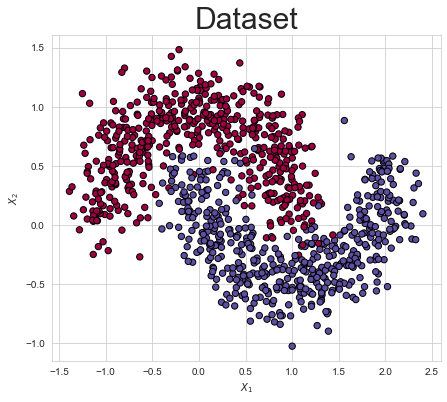

In [35]:
make_plot(X, y, "Dataset")

## 9. Fitting and Evaluation

### 9.1 Training the Neural Network Model

In [36]:
params_values, cost_history, accuracy_history = train(
    X=np.transpose(main()[0]),
    Y=np.transpose(main()[1].reshape((main()[1].shape[0], 1))),
    nn_architecture=NN_ARCHITECTURE,
    epochs=100,
    learning_rate=0.01,
    verbose=False,
    callback=callback_numpy_plot)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 2)

## 9.2 Plot Training Costs and Accuracies per Epoch

In [55]:
plt.figure()
plt.style.use('default')
plt.show()

<Figure size 432x288 with 0 Axes>

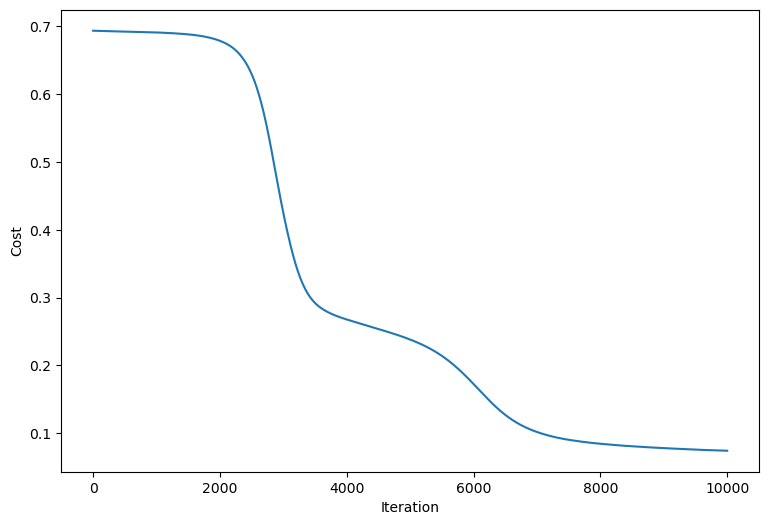

In [56]:
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()


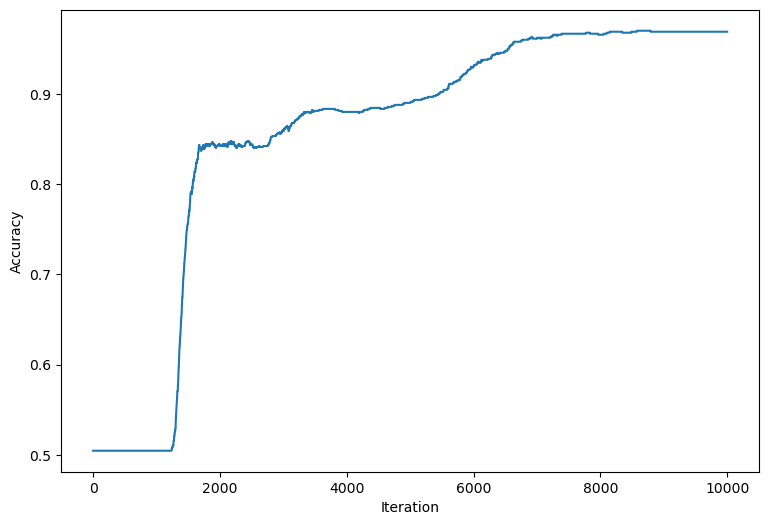

In [57]:
plt.figure(figsize=(9,6))
plt.plot(accuracy_history)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

## 9.3 Evaluate and Visualize the Model on Test Data

In [20]:
# Prediction
Y_test_hat, _ = full_forward_propagation(np.transpose(main()[2]), params_values,
                                         NN_ARCHITECTURE)
# Accuracy achieved on the test set
acc_test = get_accuracy_value(
    Y_test_hat, np.transpose(main()[3].reshape((main()[3].shape[0], 1))))
print("Test set accuracy: {:.2f}".format(acc_test))

NameError: name 'params_values' is not defined

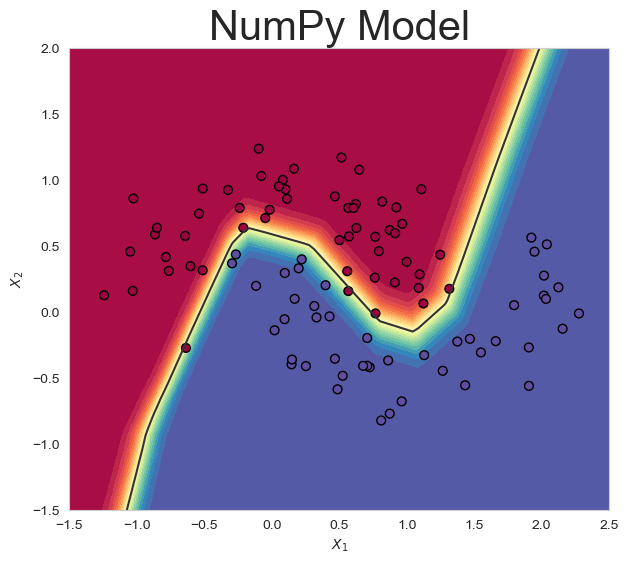

In [59]:
prediction_probs_numpy, _ = full_forward_propagation(np.transpose(grid_2d),
                                                     params_values,
                                                     NN_ARCHITECTURE)
prediction_probs_numpy = prediction_probs_numpy.reshape(
    prediction_probs_numpy.shape[1], 1)
make_plot(main()[2],
          main()[3],
          "NumPy Model",
          file_name=None,
          XX=XX,
          YY=YY,
          preds=prediction_probs_numpy)
